In [103]:
# %pip install pandas seaborn sklearn

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [104]:
df = pd.read_csv('dataset_B_05_2020.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [123]:
df.shape

(11430, 88)

In [124]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


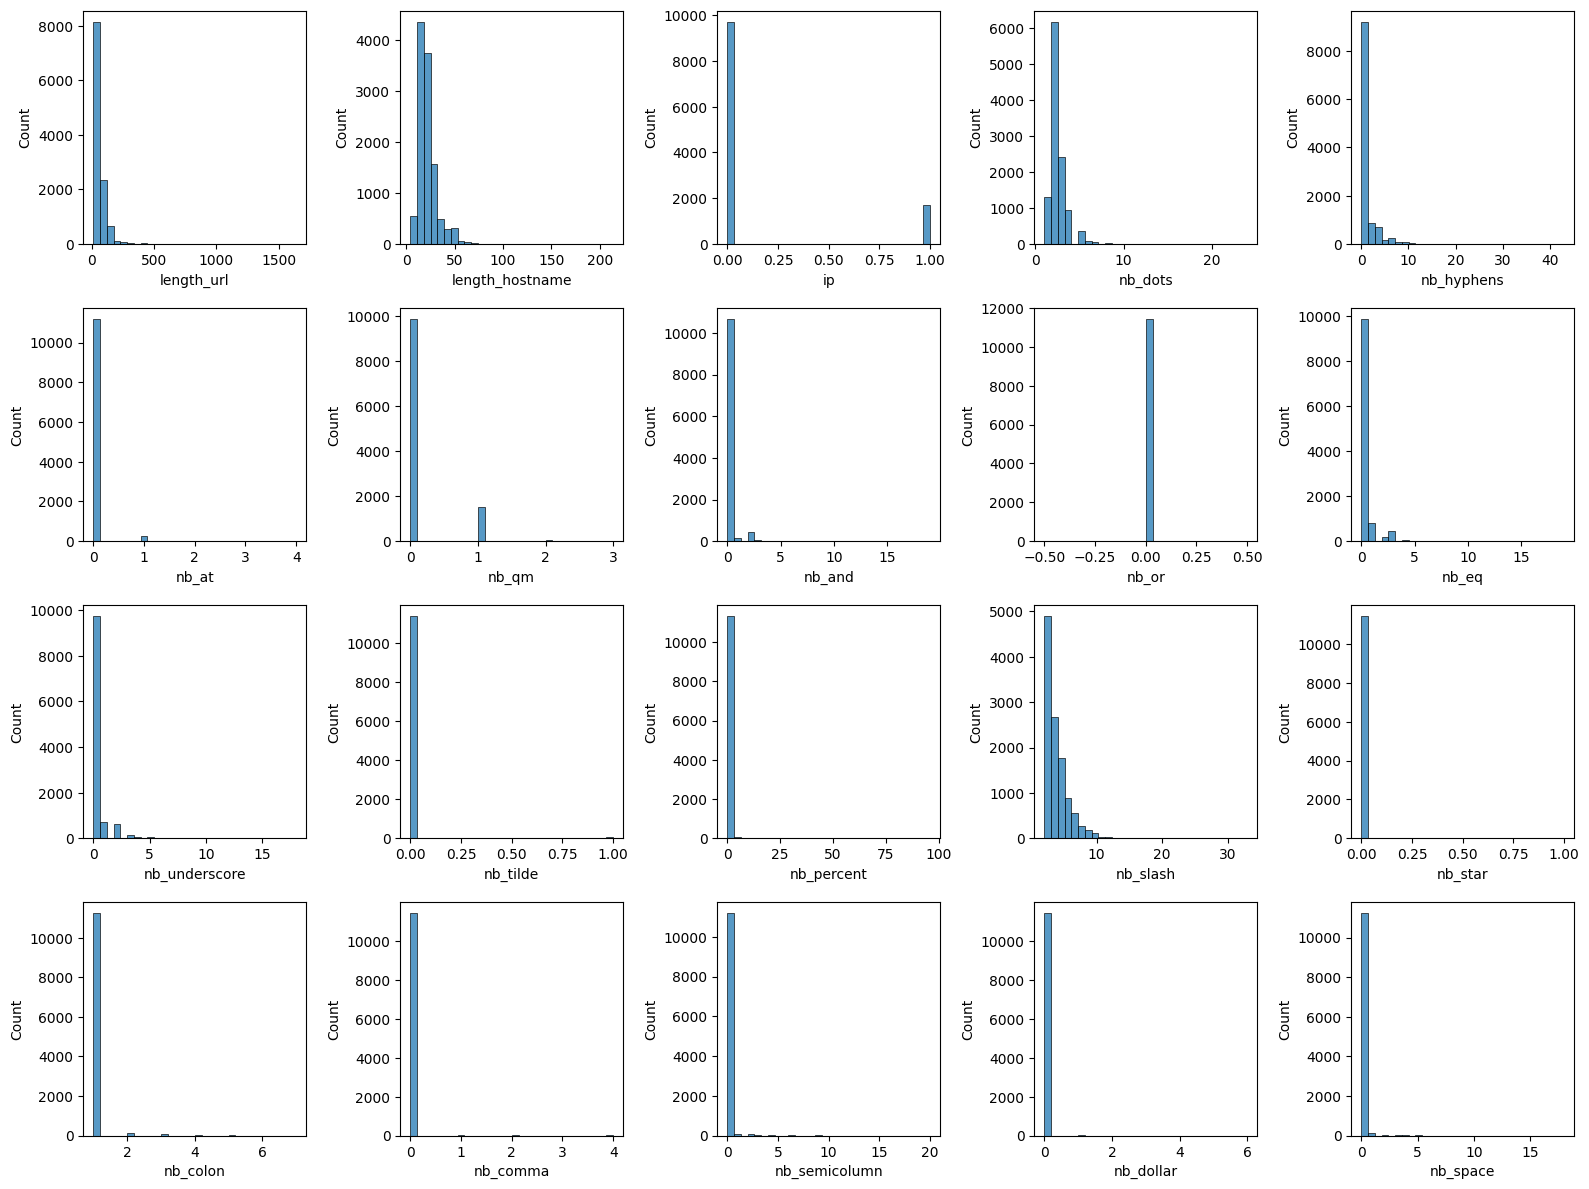

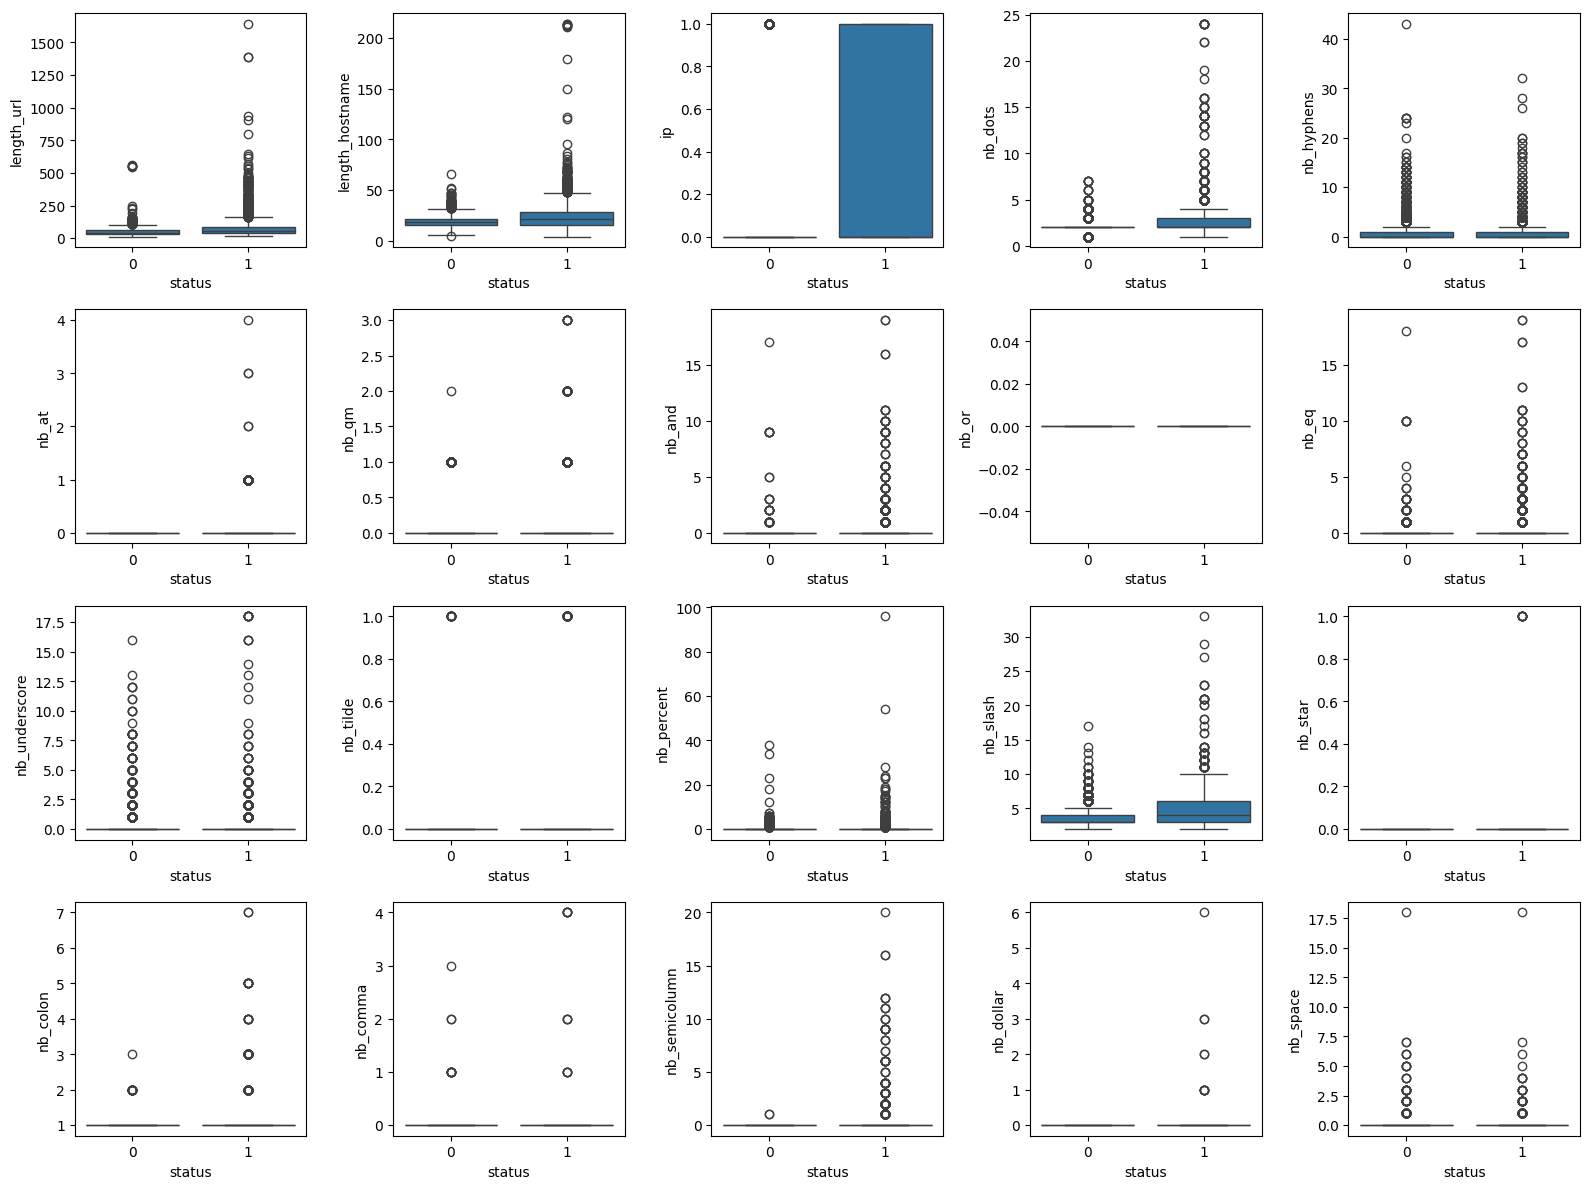

In [127]:
def plot_histograms(df, features, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(16, 12))
    for i, feature in enumerate(features):
        sns.histplot(df[feature], bins=30, ax=ax[i // cols, i % cols])
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, features, rows, cols, target):
    fig, ax = plt.subplots(rows, cols, figsize=(16, 12))
    for i, feature in enumerate(features):
        sns.boxplot(x=target, y=feature, data=df, ax=ax[i // cols, i % cols])
    plt.tight_layout()
    plt.show()

# Plot histograms for the first 20 features
plot_histograms(df, df.columns[:20], 4, 5)

# Plot box plots for the first 20 features against the target
plot_boxplots(df, df.columns[:20], 4, 5, df['status'])


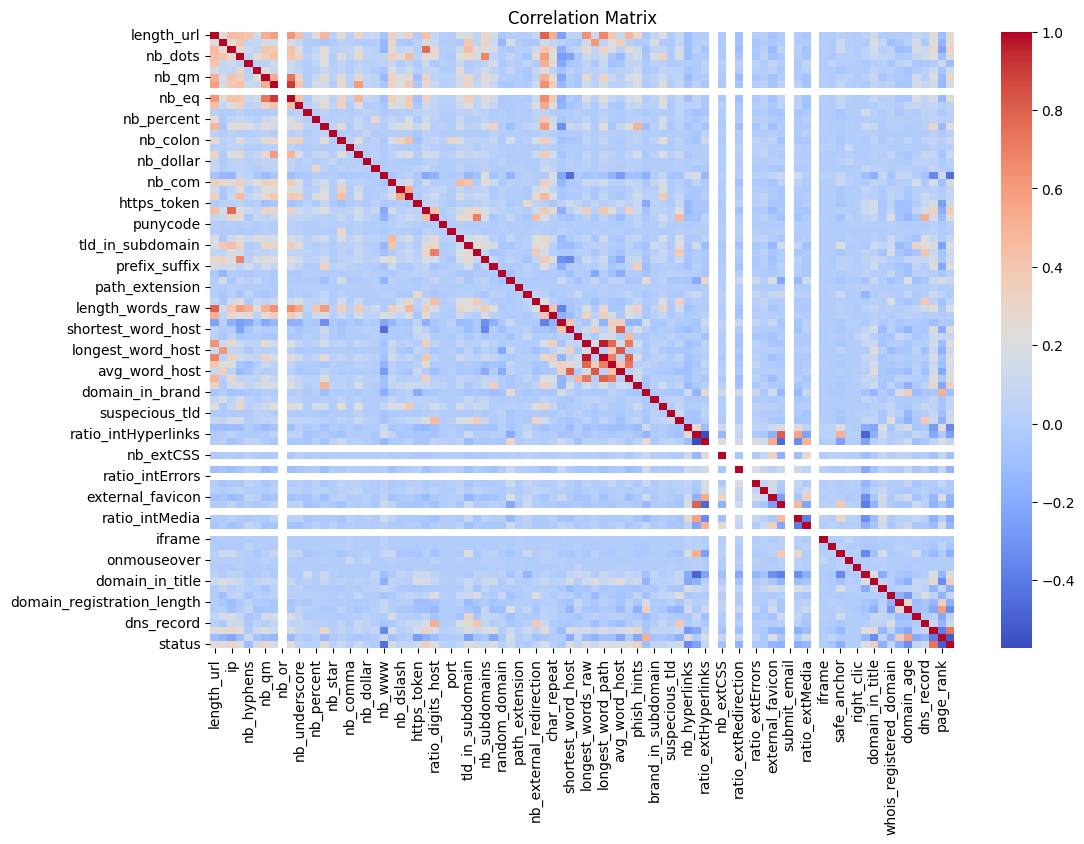

status                 1.000000
google_index           0.731171
page_rank              0.511137
nb_www                 0.443468
ratio_digits_url       0.356395
domain_in_title        0.342807
nb_hyperlinks          0.342628
phish_hints            0.335393
domain_age             0.331889
ip                     0.321698
nb_qm                  0.294319
length_url             0.248580
ratio_intHyperlinks    0.243982
nb_slash               0.242270
length_hostname        0.238322
nb_eq                  0.233386
ratio_digits_host      0.224335
shortest_word_host     0.223084
prefix_suffix          0.214681
longest_word_path      0.212709
Name: status, dtype: float64


In [129]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Selecting highly correlated features with the target variable
correlation_with_target = correlation_matrix['status'].abs().sort_values(ascending=False)
print(correlation_with_target.head(20))  # Show top 20 features correlated with target

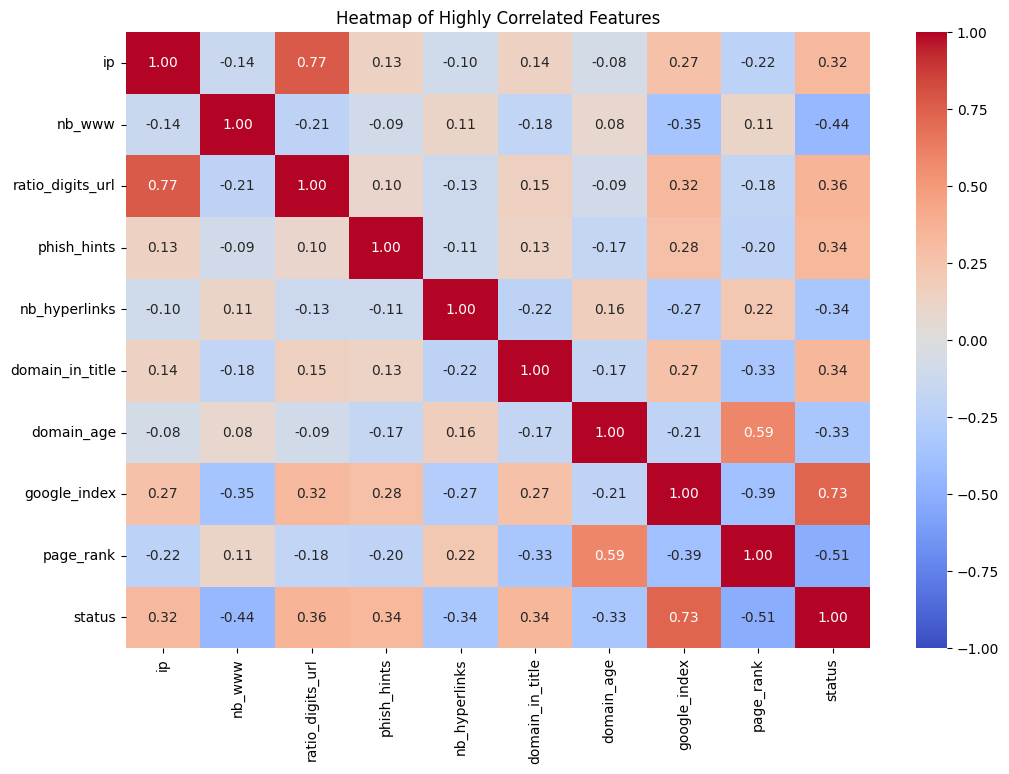

In [139]:
correlation_matrix = df.corr()

# Threshold for high correlation (e.g., |correlation| > 0.5)
threshold = 0.3

# Identify features that have high correlation with the target variable
target_corr = correlation_matrix['status'].abs()
high_corr_features = target_corr[target_corr > threshold].index

# Create a filtered correlation matrix
filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [105]:
df = df.drop(['url'], axis=1)

In [106]:
df.isna().sum()

length_url         0
length_hostname    0
ip                 0
nb_dots            0
nb_hyphens         0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 88, dtype: int64

In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [108]:
df.dtypes

length_url         int64
length_hostname    int64
ip                 int64
nb_dots            int64
nb_hyphens         int64
                   ...  
web_traffic        int64
dns_record         int64
google_index       int64
page_rank          int64
status             int32
Length: 88, dtype: object

In [109]:
X = df.drop('status', axis=1)
Y = df['status']

In [110]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, Y)

RandomForestClassifier()

[68 71 27 61 59  8 63 18 14 38 36 75 52 76 72 16 11 22 73 53 28  5 17 29
 30 15 34 31 23 21 80 55 54 65 19 12 66 35  7 77 33 24 84 10 60 37 32 69
 51 64 70 79 41  2  9 45  6 48  4 47 26 78 13 42 43 40  3 81  1 39 49  0
 67 44 25 62 74 57 46 58 50 82 20 83 56 86 85]


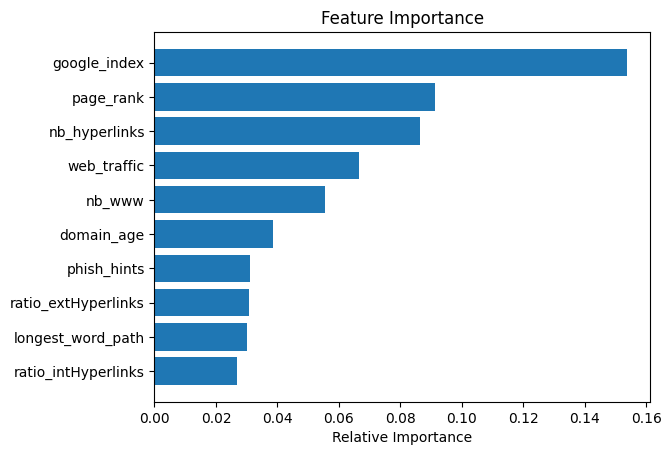

In [135]:
importances = rfc.feature_importances_
sorted_idx = np.argsort(importances)

print(sorted_idx)

top_10_idx = sorted_idx[-10:]
top_10_idx = top_10_idx[np.argsort(importances[top_10_idx])]

padding = np.arange(len(top_10_idx)) + 0.5
plt.barh(padding, importances[top_10_idx], align='center')
plt.yticks(padding, X.columns[top_10_idx])
plt.xlabel("Relative Importance")
plt.title("Feature Importance")
plt.show()

These are the top 10 most important features in classifying the URL

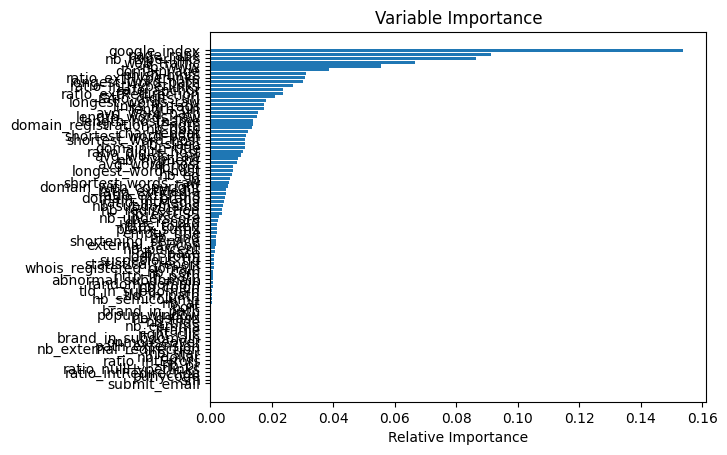

<Figure size 20000x20000 with 0 Axes>

In [114]:
importances = rfc.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(sorted_idx)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, X.columns[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.figure(figsize=(200,200))
plt.show()

# SCAK-NN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

class SCA:
    def __init__(self, max_iter=100, pop_size=50, c=0.7):
        self.max_iter = max_iter
        self.pop_size = pop_size
        self.c = c

    def optimize(self, X_train, y_train, X_valid, y_valid):
        # Initialize the population
        pop = np.random.randint(1, 20, size=self.pop_size)
        best_fitness = float('inf')
        best_solution = None

        for t in range(self.max_iter):
            for i in range(self.pop_size):
                r1 = np.random.rand()
                r2 = np.random.rand()
                r3 = np.random.rand()
                r4 = np.random.rand()

                if t % 2 == 0:
                    pop[i] = int(pop[i] * r1 * np.sin(r2) + self.c * r3)
                else:
                    pop[i] = int(pop[i] * r1 * np.cos(r2) + self.c * r3)

                pop[i] = max(1, min(20, pop[i]))  # Ensure pop[i] stays within [1, 20]

                knn = KNeighborsClassifier(n_neighbors=pop[i])
                knn.fit(X_train, y_train)
                accuracy = knn.score(X_valid, y_valid)
                fitness = 1 - accuracy  # We aim to minimize the fitness

                if fitness < best_fitness:
                    best_fitness = fitness
                    best_solution = pop[i]

        return best_solution

In [140]:
# Split training data into train and validation sets for SCA
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Run SCA optimization
sca = SCA(max_iter=100, pop_size=50, c=0.7)
best_n_neighbors = sca.optimize(X_train_part, y_train_part, X_valid, y_valid)

print(best_n_neighbors)

3


In [117]:
# Train the KNN model with the optimized number of neighbors
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, Y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report
# Evaluate the model
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1157
           1       0.96      0.93      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.95      0.94      0.94      2286
weighted avg       0.95      0.94      0.94      2286



# Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_lr)
conf_matrix = confusion_matrix(Y_test, y_pred_lr)
class_report = classification_report(Y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9558180227471567
Confusion Matrix:
 [[1111   46]
 [  55 1074]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1157
           1       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



c:\Users\bcamaster\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Neural Network

In [ ]:
!pip install pandas numpy tensorflow scikit-learn

c:\Users\bcamaster\anaconda3\envs\machine_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5537 - loss: 0.8085 - val_accuracy: 0.8272 - val_loss: 0.4859
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7124 - loss: 0.5815 - val_accuracy: 0.8727 - val_loss: 0.3798
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7892 - loss: 0.4766 - val_accuracy: 0.8950 - val_loss: 0.3061
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8284 - loss: 0.4020 - val_accuracy: 0.9099 - val_loss: 0.2557
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8494 - loss: 0.3641 - val_accuracy: 0.9252 - val_loss: 0.2211
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8836 - loss: 0.2969 - val_accuracy: 0.9339 - val_loss: 0.1944
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8919 - loss: 0.2846 - val_accuracy: 0.9374 - val_loss: 0.1761
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9031 - loss: 0.2594 - val_accuracy: 0.9436 - val_loss

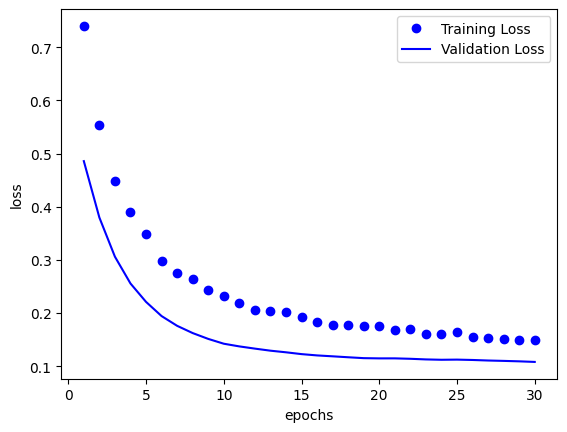

In [136]:
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Build neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Determine how many epochs
history = model.fit(X_train, Y_train, epochs = 30, batch_size=512, validation_data=(X_test, Y_test))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs,loss, 'bo', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()



The plot above shows the training loss and validation loss over 1- 30 epochs. To determine the best epoch number, it is required to look at the point where the validation loss stops improving and starts to stabilize or increase. If the training loss continues to decrease, it can indicate overfitting

From the plot, it appears that the validation loss stabilizes from 15 epochs and does not show significant improvement beyond that point. Therefore, the best epoch number seems to be 15. Setting the epoch number to 15 will help achieving a balance between underfitting and overfitting, ensuring the model generalizes well to unseen data.

In [120]:
# Train model
model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(Y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# Save the model
# model.save('phishing_url_detector.h5')

Epoch 1/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9414 - loss: 0.1725 - val_accuracy: 0.9584 - val_loss: 0.1188
Epoch 2/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9448 - loss: 0.1579 - val_accuracy: 0.9595 - val_loss: 0.1201
Epoch 3/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9503 - loss: 0.1411 - val_accuracy: 0.9584 - val_loss: 0.1249
Epoch 4/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9529 - loss: 0.1323 - val_accuracy: 0.9601 - val_loss: 0.1210
Epoch 5/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1229 - val_accuracy: 0.9579 - val_loss: 0.1226
Epoch 6/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9520 - loss: 0.1451 - val_accuracy: 0.9568 - val_loss: 0.1214
Epoch 7/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9528 - loss: 0.1287 - val_accuracy: 0.9612 - val_loss: 0.1190
Epoch 8/15
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9622 - loss: 0.1172 - val_accuracy: 0.

In [79]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

